In [139]:
import numpy as np
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns
from pyspark.ml.feature import VectorAssembler

In [140]:
df = spark.read.csv("file:///home/amit/Downloads/Salary_Data.csv",inferSchema=True,header=True)

In [141]:
df.show(5)

+---------------+----+------+
|YearsExperience| Age|Salary|
+---------------+----+------+
|            1.1|21.0| 39343|
|            1.3|21.5| 46205|
|            1.5|21.7| 37731|
|            2.0|22.0| 43525|
|            2.2|22.2| 39891|
+---------------+----+------+
only showing top 5 rows



In [142]:
feature = VectorAssembler(inputCols=['YearsExperience','Age'],outputCol='features')

In [143]:
final_data  = feature.transform(df)

In [144]:
final_data = final_data.select('features','Salary')

In [145]:
final_data.show(5)

+----------+------+
|  features|Salary|
+----------+------+
|[1.1,21.0]| 39343|
|[1.3,21.5]| 46205|
|[1.5,21.7]| 37731|
|[2.0,22.0]| 43525|
|[2.2,22.2]| 39891|
+----------+------+
only showing top 5 rows



In [146]:
train,test = final_data.randomSplit([0.8,0.3])

In [147]:
from pyspark.ml.regression import LinearRegression

In [148]:
regressor = LinearRegression(featuresCol = 'features', labelCol = 'Salary')
regressor = regressor.fit(train)

2021-12-27 21:39:21,734 WARN util.Instrumentation: [19994a3c] regParam is zero, which might cause numerical instability and overfitting.


In [149]:
predictions = regressor.transform(test)
predictions.show(10)

+-----------+------+------------------+
|   features|Salary|        prediction|
+-----------+------+------------------+
| [1.5,21.7]| 37731| 44278.90579151802|
| [2.0,22.0]| 43525| 47512.20530813934|
| [4.0,24.0]| 56957| 62288.41194821046|
| [4.9,25.0]| 67938|  69168.0810079407|
| [7.1,30.0]| 98273| 91872.43831956924|
| [9.5,35.0]|116969|115593.66415180847|
|[10.3,37.0]|122391|124268.65966821562|
+-----------+------+------------------+



In [155]:
regressor.coefficients

DenseVector([5084.3426, 2303.7607])

In [156]:
regressor.intercept

-13339.21567157692

In [150]:
nnn = predictions.toPandas()

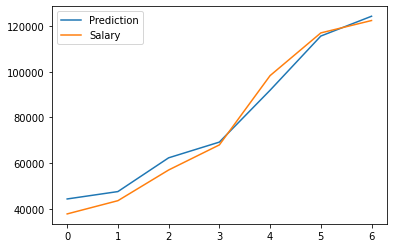

In [151]:
plt.plot(nnn['prediction'])
plt.plot(nnn['Salary'])
plt.legend(['Prediction','Salary'])

In [152]:
results = regressor.evaluate(test)

In [153]:
results.rootMeanSquaredError

4393.083417981861

In [154]:
print("Root Mean Squared Error (RMSE) on test data = %g" % results.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 4393.08
